<a href="https://colab.research.google.com/github/Moya505/Adaptive-Behavioral-Anomaly-Detection-for-Fraudulent-Transactions/blob/main/Adaptive_Behavioral_Anomaly_Detection_for_Fraudulent_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the PaySim dataset
# df = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')  # Adjust filename as needed
from google.colab import drive
drive.mount('/content/drive')

# After mounting, you can access files in your Drive
# For example, if 'my_data.csv' is in a folder named 'Colab Notebooks'
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')

# Display basic info
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Total transactions: {len(df):,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATASET OVERVIEW
Total transactions: 6,362,620
Number of columns: 19

Column names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'orig_txn_count', 'orig_total_amount', 'orig_avg_amount', 'origin_balance_delta', 'dest_balance_delta', 'is_high_risk_type', 'log_amount', 'amount_vs_avg']

Memory usage: 1840.91 MB


In [ ]:
print("\n" + "="*50)
print("FIRST 10 TRANSACTIONS")
print("="*50)
print(df.head(10))

# Show data types
print("\n" + "="*50)
print("DATA TYPES & MISSING VALUES")
print("="*50)
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


FIRST 10 TRANSACTIONS
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0            0.00        0               0   
1

In [ ]:
print("\n" + "="*50)
print("FRAUD vs NORMAL TRANSACTIONS")
print("="*50)

# Count fraud cases
fraud_counts = df['isFraud'].value_counts()
print("\nAbsolute Counts:")
print(f"Normal (0): {fraud_counts[0]:,}")
print(f"Fraud (1):  {fraud_counts[1]:,}")

# Calculate percentages
fraud_rate = df['isFraud'].mean() * 100
normal_rate = 100 - fraud_rate
print(f"\nPercentages:")
print(f"Normal: {normal_rate:.2f}%")
print(f"Fraud:  {fraud_rate:.2f}%")

print(f"\n Class Imbalance Ratio: 1:{fraud_counts[0]//fraud_counts[1]}")
print(f"   (For every 1 fraud, there are ~{fraud_counts[0]//fraud_counts[1]} normal transactions)")


FRAUD vs NORMAL TRANSACTIONS

Absolute Counts:
Normal (0): 6,354,407
Fraud (1):  8,213

Percentages:
Normal: 99.87%
Fraud:  0.13%

 Class Imbalance Ratio: 1:773
   (For every 1 fraud, there are ~773 normal transactions)


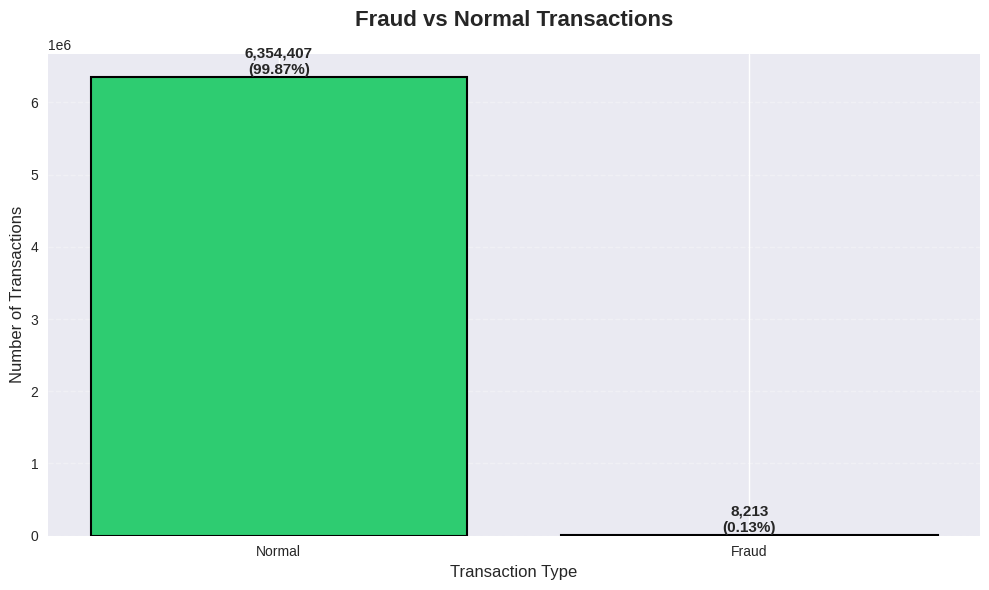


TRANSACTION TYPES BREAKDOWN
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


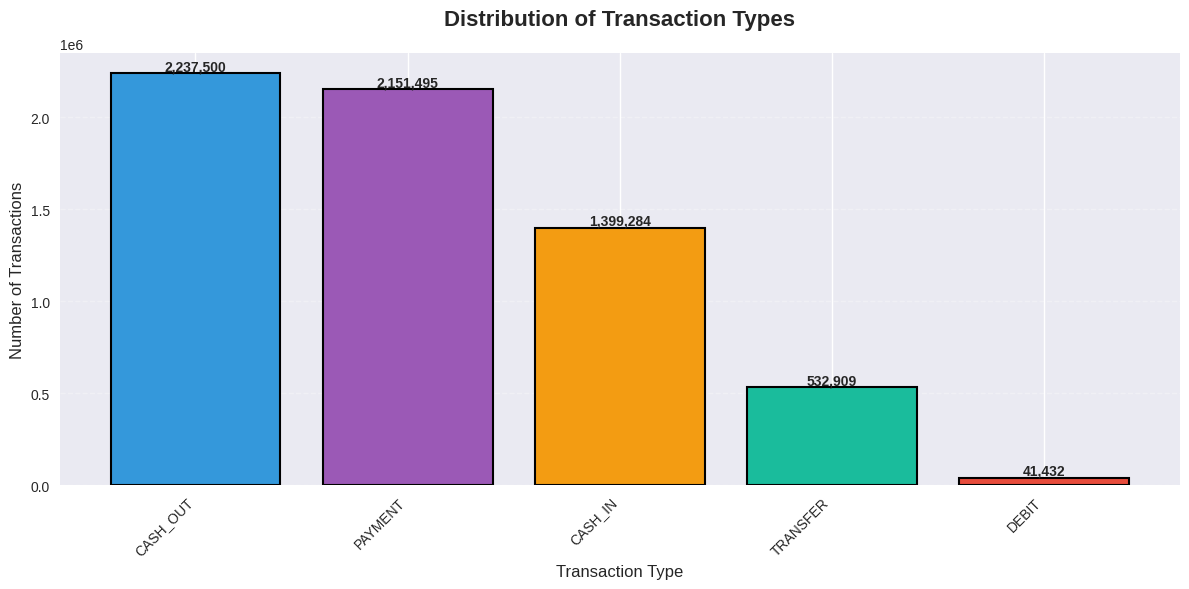


FRAUD RATES BY TRANSACTION TYPE
          Fraud_Count  Total_Count  Fraud_Rate
type                                          
TRANSFER         4097       532909    0.768799
CASH_OUT         4116      2237500    0.183955
CASH_IN             0      1399284    0.000000
DEBIT               0        41432    0.000000
PAYMENT             0      2151495    0.000000


In [ ]:
# 4a. Fraud vs Normal Bar Chart
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#e74c3c']  # Green for normal, red for fraud
bars = plt.bar(['Normal', 'Fraud'], fraud_counts.values, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}\n({height/len(df)*100:.2f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Fraud vs Normal Transactions', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Transaction Type', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('fraud_vs_normal.png', dpi=300, bbox_inches='tight')
plt.show()

# 4b. Transaction Types Chart (PAYMENT, TRANSFER, CASH_OUT, etc.)
print("\n" + "="*50)
print("TRANSACTION TYPES BREAKDOWN")
print("="*50)

type_counts = df['type'].value_counts()
print(type_counts)

plt.figure(figsize=(12, 6))
colors_types = ['#3498db', '#9b59b6', '#f39c12', '#1abc9c', '#e74c3c']
bars = plt.bar(type_counts.index, type_counts.values, color=colors_types, edgecolor='black', linewidth=1.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Distribution of Transaction Types', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Transaction Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('transaction_types.png', dpi=300, bbox_inches='tight')
plt.show()

# 4c. Fraud by Transaction Type
print("\n" + "="*50)
print("FRAUD RATES BY TRANSACTION TYPE")
print("="*50)

fraud_by_type = df.groupby('type')['isFraud'].agg(['sum', 'count', 'mean'])
fraud_by_type.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate']
fraud_by_type['Fraud_Rate'] = fraud_by_type['Fraud_Rate'] * 100
print(fraud_by_type.sort_values('Fraud_Rate', ascending=False))

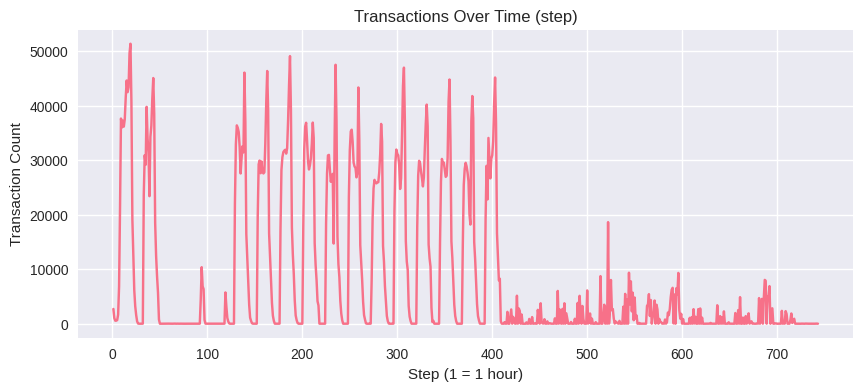

In [ ]:
plt.figure(figsize=(10,4))
df.groupby('step').size().plot()
plt.title("Transactions Over Time (step)")
plt.xlabel("Step (1 = 1 hour)")
plt.ylabel("Transaction Count")
plt.show()

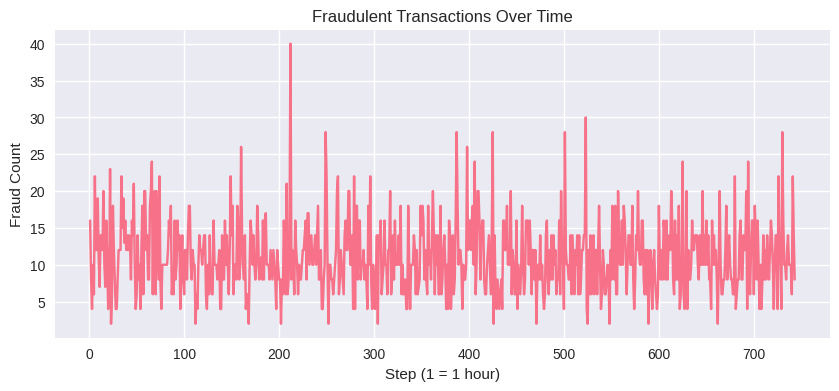

In [ ]:
plt.figure(figsize=(10,4))
df[df['isFraud']==1].groupby('step').size().plot()
plt.title("Fraudulent Transactions Over Time")
plt.xlabel("Step (1 = 1 hour)")
plt.ylabel("Fraud Count")
plt.show()

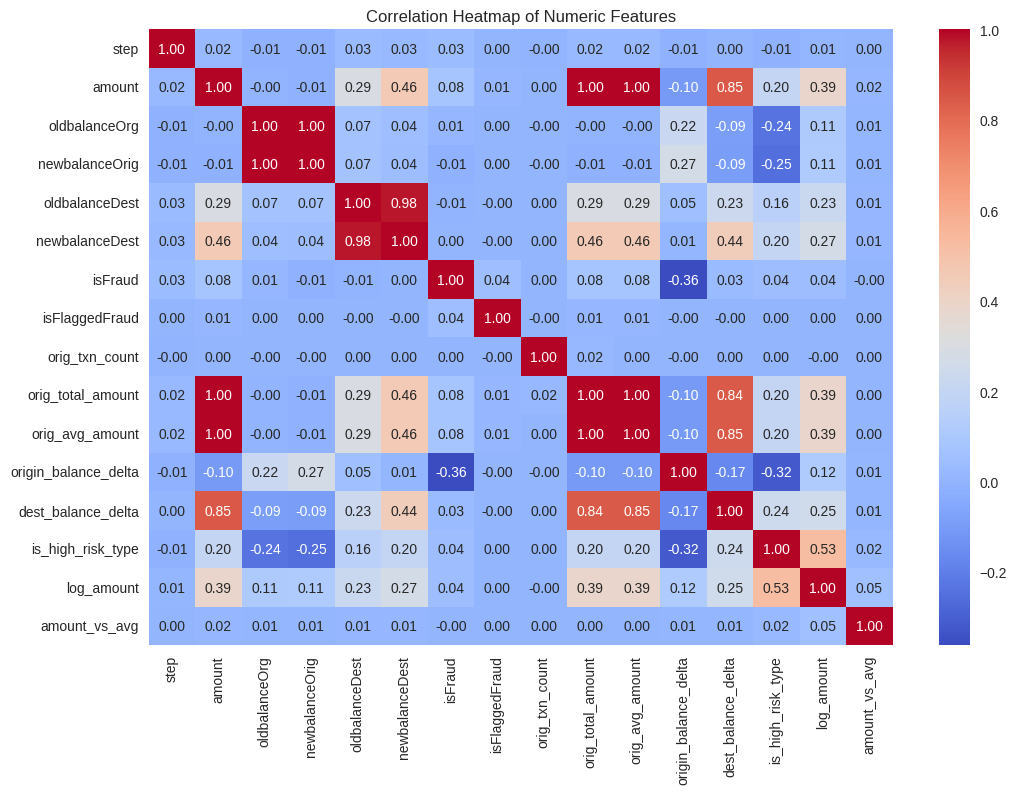

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Assume the original dataframe 'df' is loaded somewhere before this code runs.
# Example: df = pd.read_csv('your_data_file.csv')

# 1. Origin account features
df['orig_txn_count'] = df.groupby('nameOrig')['amount'].transform('count')
df['orig_total_amount'] = df.groupby('nameOrig')['amount'].transform('sum')
df['orig_avg_amount'] = df.groupby('nameOrig')['amount'].transform('mean')

# 2. Balance features
df['origin_balance_delta'] = df['newbalanceOrig'] - df['oldbalanceOrg']
# Destination is normal
df['dest_balance_delta'] = df['newbalanceDest'] - df['oldbalanceDest']

# 3. High-risk transaction flag
df['is_high_risk_type'] = df['type'].isin(['TRANSFER', 'CASH_OUT']).astype(int)

# 4. Amount Transformations
df['log_amount'] = np.log1p(df['amount'])
df['amount_vs_avg'] = df['amount'] / (df['orig_avg_amount'] + 1)

# --- New Code Additions ---

# Create a new dataset that counts the number of instances of fraud in all payment types.
fraud_count_by_payment_type = df.groupby('type')['isFraud'].sum().reset_index(name='fraud_count')
print("Fraud count by payment type:")
print(fraud_count_by_payment_type)

# Create a dataset with just the payment types that have fraud.
payment_types_with_fraud = fraud_count_by_payment_type[fraud_count_by_payment_type['fraud_count'] > 0]
print("\nPayment types with fraud:")
print(payment_types_with_fraud)

# --- End New Code Additions ---

# 5. Clean
df = df.fillna(0)

# 6. Save (Uncomment and modify path as needed)
#output_path = "/content/drive/MyDrive/Modified_Dataset.csv"
#df.to_csv(output_path, index=False)
#print(f"Saved to: {output_path}")

#print("\nNew columns added:")
#print([col for col in df.columns if col not in ['step','type','amount','nameOrig','nameDest', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest', 'isFraud','isFlaggedFraud']])



Fraud count by payment type:
       type  fraud_count
0   CASH_IN            0
1  CASH_OUT         4116
2     DEBIT            0
3   PAYMENT            0
4  TRANSFER         4097

Payment types with fraud:
       type  fraud_count
1  CASH_OUT         4116
4  TRANSFER         4097


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load from Drive
#df = pd.read_csv('/content/drive/MyDrive/your_paysim_file.csv')

# Rest of the code remains the same
filtered_df = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]
filtered_df.to_csv('/content/drive/MyDrive/paysim_cashout_transfer.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
#0. Load Data
from google.colab import drive
drive.mount('/content/drive')

# After mounting, you can access files in your Drive
# For example, if 'my_data.csv' is in a folder named 'Colab Notebooks'
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/paysim_cashout_transfer.csv')

data = {
    'step': np.arange(1, 10001), # Simulate 10000 steps/timestamps
    'type': np.random.choice(['CASH_OUT', 'TRANSFER'], size=10000), # Filtered types
    'amount': np.random.uniform(10, 500000, size=10000),
    'nameOrig': [f'C{i}' for i in np.random.randint(1000000, 2000000, size=10000)], # User IDs
    'oldbalanceOrg': np.random.uniform(0, 1000000, size=10000),
    'newbalanceOrig': np.random.uniform(0, 1000000, size=10000),
    'isFraud': np.random.choice([0, 1], size=10000, p=[0.999, 0.001]) # Very low fraud rate
}
#df = pd.DataFrame(data)

# Calculate the balance change feature needed for behavioral aggregation
df['Balance_Change'] = df['newbalanceOrig'] - df['oldbalanceOrg']

print(f"Total Transactions After Filtering: {len(df)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total Transactions After Filtering: 2770409


In [ ]:
# Data Preparation and Temporal Split
# Define the cutoff point for the static training data (e.g., the first 30% of 'step')
cutoff_step = df['step'].quantile(0.3)

# D_static_train: Data for training the static model
D_static_train = df[df['step'] <= cutoff_step].copy()

# D_eval: Data for evaluation (later transactions)
D_eval = df[df['step'] > cutoff_step].copy()

print(f"Static Training Samples: {len(D_static_train)}")
print(f"Evaluation Samples: {len(D_eval)}")

Static Training Samples: 834523
Evaluation Samples: 1935886


In [ ]:
# Calculate aggregate features for each user in the training set
user_behavior_features = D_static_train.groupby('nameOrig').agg(
    avg_amount=('amount', 'mean'),
    freq_count=('step', 'count'),
    std_balance_change=('Balance_Change', 'std')
).reset_index()

# Fill NaN in std_balance_change (happens for users with only one transaction in D_static_train)
user_behavior_features['std_balance_change'] = user_behavior_features['std_balance_change'].fillna(0)

# Merge the features into both the training and evaluation sets
D_static_train = pd.merge(D_static_train, user_behavior_features, on='nameOrig', how='left')
D_eval = pd.merge(D_eval, user_behavior_features, on='nameOrig', how='left')

# Handle new users in D_eval (users not seen in the static training period)
# Assign a default 'normal' behavior based on the training set averages
default_avg_amount = D_static_train['amount'].mean()
default_freq_count = D_static_train['step'].count() / D_static_train['nameOrig'].nunique()

D_eval[['avg_amount', 'freq_count', 'std_balance_change']] = D_eval[['avg_amount', 'freq_count', 'std_balance_change']].fillna({
    'avg_amount': default_avg_amount,
    'freq_count': default_freq_count,
    'std_balance_change': 0
})

In [ ]:
#Calculate aggregate features for each user in the training set
user_behavior_features = D_static_train.groupby('nameOrig').agg(
    avg_amount=('amount', 'mean'),
    freq_count=('step', 'count'),
    std_balance_change=('Balance_Change', 'std')
).reset_index()

# Fill NaN in std_balance_change (happens for users with only one transaction in D_static_train)
user_behavior_features['std_balance_change'] = user_behavior_features['std_balance_change'].fillna(0)

# Merge the features into both the training and evaluation sets
D_static_train = pd.merge(D_static_train, user_behavior_features, on='nameOrig', how='left')
D_eval = pd.merge(D_eval, user_behavior_features, on='nameOrig', how='left')

# Handle new users in D_eval (users not seen in the static training period)
# Assign a default 'normal' behavior based on the training set averages
default_avg_amount = D_static_train['amount'].mean()
default_freq_count = D_static_train['step'].count() / D_static_train['nameOrig'].nunique()

D_eval[['avg_amount', 'freq_count', 'std_balance_change']] = D_eval[['avg_amount', 'freq_count', 'std_balance_change']].fillna({
    'avg_amount': default_avg_amount,
    'freq_count': default_freq_count,
    'std_balance_change': 0
})

In [ ]:
# Preprocessing Pipeline
# Define features for the model
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'Balance_Change',
                      'avg_amount', 'freq_count', 'std_balance_change']
categorical_features = ['type'] # Only contains CASH_OUT and TRANSFER

# Create a column transformer for scaling numerical features and OHE for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        # OneHotEncoder is still needed, though it only creates 2 columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    # We drop columns like 'nameOrig', 'isFraud', 'step' to feed only features to IF
    remainder='drop'
)

# Fit the preprocessor only on the training data and transform both sets
X_train_processed = preprocessor.fit_transform(D_static_train)
X_eval_processed = preprocessor.transform(D_eval) # Apply the same transformation

In [ ]:
# Training the Static Isolation Forest Model
# Contamination is crucial: set it to your estimated fraud rate (e.g., 0.5%)
contamination_rate = 0.005

print(f"\nTraining Static Isolation Forest with contamination={contamination_rate}...")


# Initialize and train the Static Isolation Forest model
static_if_model = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=contamination_rate,
    random_state=42,
    n_jobs=-1
)

# Train the model on the static early-period data
static_if_model.fit(X_train_processed)

print("Static Model Training Complete.")


Training Static Isolation Forest with contamination=0.005...
Static Model Training Complete.


In [ ]:
# Deployment and Scoring (Evaluation)
# Apply the fixed static model to the later, unseen D_eval data.

# Get anomaly scores (lower score = more anomalous)
D_eval['static_anomaly_score'] = static_if_model.decision_function(X_eval_processed)

# Get predicted anomaly labels (-1 = anomaly/fraud, 1 = normal)
D_eval['static_prediction'] = static_if_model.predict(X_eval_processed)

# Convert Isolation Forest labels (-1, 1) to (1, 0) for standard metric calculation
D_eval['pred_fraud'] = np.where(D_eval['static_prediction'] == -1, 1, 0)

In [ ]:
# Comparison Metrics for the Static Model
y_true = D_eval['isFraud']
y_pred = D_eval['pred_fraud']

# For ROC-AUC, we use the score. We negate it so a higher value indicates more fraud (higher = better for AUC)
y_score_for_auc = -D_eval['static_anomaly_score']

print("\n### Static Model Evaluation Metrics on D_eval ###")
print(f"Precision: {precision_score(y_true, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_true, y_pred, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_true, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_true, y_score_for_auc):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Display a sample of the results
print("\nSample of Evaluation Data with Scores:")
print(D_eval[['step', 'type', 'amount', 'isFraud', 'static_anomaly_score', 'pred_fraud']].head(10))


### Static Model Evaluation Metrics on D_eval ###
Precision: 0.4151
Recall: 0.3142
F1-Score: 0.3577
ROC-AUC: 0.9244

Confusion Matrix:
[[1926758    2801]
 [   4339    1988]]

Sample of Evaluation Data with Scores:
   step      type     amount  isFraud  static_anomaly_score  pred_fraud
0   165  TRANSFER  626435.47        0              0.117252           0
1   165  CASH_OUT   37820.04        0              0.319319           0
2   165  CASH_OUT   21581.46        0              0.347539           0
3   165  CASH_OUT   49562.43        0              0.348470           0
4   165  CASH_OUT  198310.09        0              0.361054           0
5   165  CASH_OUT  271886.61        0              0.362057           0
6   165  CASH_OUT  215505.70        0              0.361517           0
7   165  CASH_OUT  216975.16        0              0.338848           0
8   165  CASH_OUT  201308.06        0              0.333190           0
9   165  CASH_OUT  260672.55        0              0.362057      